 # ⭐Importing Libs and Data

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load Data
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 🔢  Step 1 : Five- Number Summary

In [4]:
print(tips['total_bill'].describe())
print(tips['tip'].describe()[['min','25%','50%','75%','max']])

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64
min     1.0000
25%     2.0000
50%     2.9000
75%     3.5625
max    10.0000
Name: tip, dtype: float64


# 📦 Step 2 : Boxplots for Total Bill and Tip

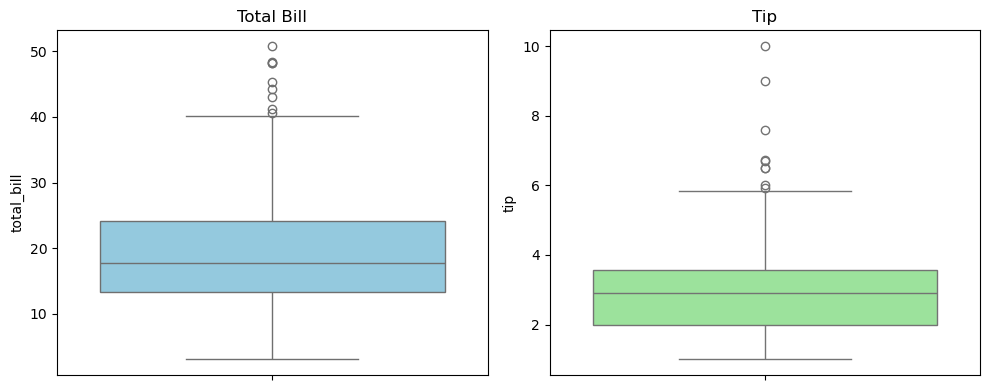

In [5]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(y=tips['total_bill'], color='skyblue')
plt.title("Total Bill")

plt.subplot(1,2,2)
sns.boxplot(y=tips['tip'], color='lightgreen')
plt.title("Tip")

plt.tight_layout()
plt.show()

In [6]:
#Quantiles
Q1b,Q3b=tips['total_bill'].quantile([0.25,0.75])
Q1t,Q3t=tips['tip'].quantile([0.25,0.75])

# Calculate IQR
IQR_bill,IQR_tip=Q3b-Q1b,Q3t-Q1t


# IQR method for Outlier Detection
out_bill=tips[(tips['total_bill'] < (Q1b-1.5*IQR_bill)) | (tips['total_bill'] > (Q3b+1.5*IQR_bill))] # outliers
out_tip=tips[(tips['tip'] < (Q1t-1.5*IQR_tip)) | (tips['tip'] > (Q3t+1.5*IQR_tip))]   # outliers

#Results
print(f"IQR(Total Bill) = {IQR_bill:.2f},Outliers: {len(out_bill)}") # length of outliers
print(f"IQR(Tip) = {IQR_tip:.2f},Outliers: {len(out_tip)}")  # length of outliers

IQR(Total Bill) = 10.78,Outliers: 9
IQR(Tip) = 1.56,Outliers: 9


In [7]:
print(out_bill)

     total_bill    tip     sex smoker   day    time  size
59        48.27   6.73    Male     No   Sat  Dinner     4
102       44.30   2.50  Female    Yes   Sat  Dinner     3
142       41.19   5.00    Male     No  Thur   Lunch     5
156       48.17   5.00    Male     No   Sun  Dinner     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
182       45.35   3.50    Male    Yes   Sun  Dinner     3
184       40.55   3.00    Male    Yes   Sun  Dinner     2
197       43.11   5.00  Female    Yes  Thur   Lunch     4
212       48.33   9.00    Male     No   Sat  Dinner     4


In [8]:
print(out_tip)

     total_bill    tip     sex smoker   day    time  size
23        39.42   7.58    Male     No   Sat  Dinner     4
47        32.40   6.00    Male     No   Sun  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
141       34.30   6.70    Male     No  Thur   Lunch     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
183       23.17   6.50    Male    Yes   Sun  Dinner     4
212       48.33   9.00    Male     No   Sat  Dinner     4
214       28.17   6.50  Female    Yes   Sat  Dinner     3
239       29.03   5.92    Male     No   Sat  Dinner     3


 # 📓 Step 3 : IQR and Outlier Detection

IQR = Q3 -Q1

min side outlier formula : Q1 -1.5 * IQR

max side outlier formula : Q3 -1.5 * IQR

In [9]:
# Quantiles
Q1b,Q3b=tips['total_bill'].quantile([0.25,0.75])
Q1t,Q3t=tips['tip'].quantile([0.25,0.75])

# Calculate IQR
IQR_bill,IQR_tip=Q3b-Q1b,Q3t-Q1t


# IQR method for Outlier Detection
out_bill=tips[(tips['total_bill'] < (Q1b-1.5*IQR_bill)) | (tips['total_bill'] > (Q3b+1.5*IQR_bill))] # outliers
out_tip=tips[(tips['tip'] < (Q1t-1.5*IQR_tip)) | (tips['tip'] > (Q3t+1.5*IQR_tip))]   # outliers

#Results
print(f"IQR(Total Bill) = {IQR_bill:.2f},Outliers: {len(out_bill)}") # length of outliers
print(f"IQR(Tip) = {IQR_tip:.2f},Outliers: {len(out_tip)}")  # length of outliers

IQR(Total Bill) = 10.78,Outliers: 9
IQR(Tip) = 1.56,Outliers: 9


#  📊 Step 4 : Histograms and Skewness

Right skewed graph has positive value

Left skewed graph has negative value

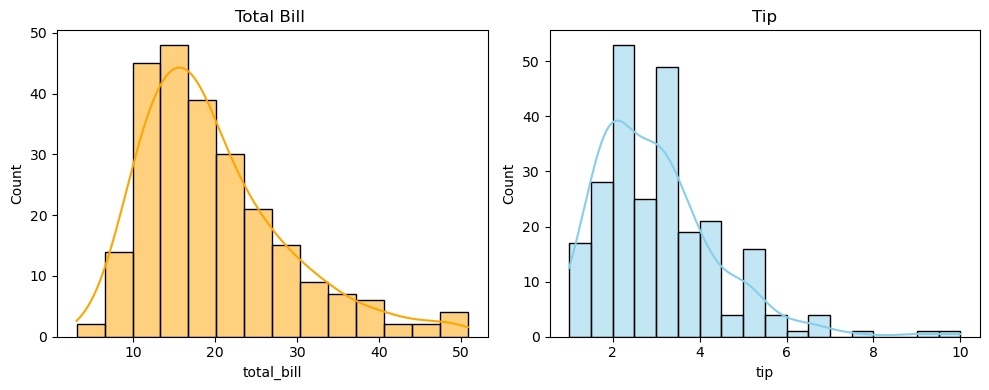

Skewness -> Total Bill : 1.13, Tip : 1.47


In [10]:
# Histograms and Skewness
plt.figure(figsize=(10,4)) 

# Plots
plt.subplot(1,2,1) ; sns.histplot(tips['total_bill'], kde=True, color='orange') ; plt.title('Total Bill ')
plt.subplot(1,2,2) ; sns.histplot(tips['tip'], kde=True, color='skyblue') ; plt.title('Tip')
plt.tight_layout() ; plt.show()

# Skewness
print(f'Skewness -> Total Bill : {tips["total_bill"].skew():.2f}, Tip : {tips["tip"].skew():.2f}')

# 📈 Step 5 : Cumulative Frequency Polygon

<function matplotlib.pyplot.show(close=None, block=None)>

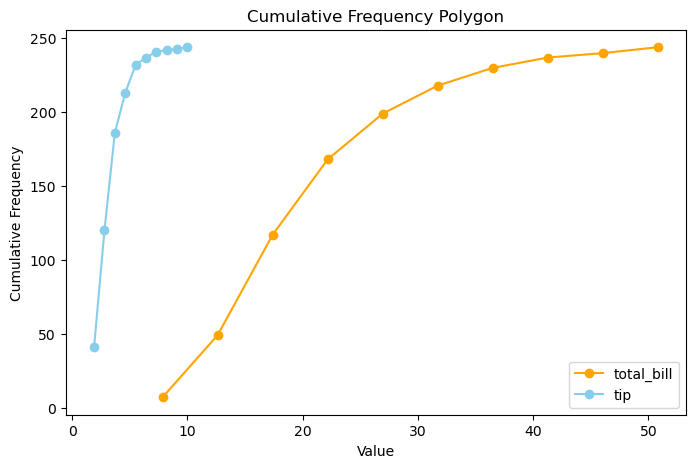

In [11]:
# Cumulative Frequency Polygon
plt.figure(figsize=(8,5))

# Plots
for col, color in zip(['total_bill','tip'], ['orange','skyblue']):
    count,bins=np.histogram(tips[col], bins=10)
    plt.plot(bins[1:], np.cumsum(count) , marker='o', color=color, label=col)

# Labels
plt.title('Cumulative Frequency Polygon')
plt.xlabel('Value') ; plt.ylabel('Cumulative Frequency') ; plt.legend() ; plt.show

 # 📊Step 6 : Frequnecy table and Bar Chart for Size

size
1      4
2    156
3     38
4     37
5      5
6      4
Name: count, dtype: int64


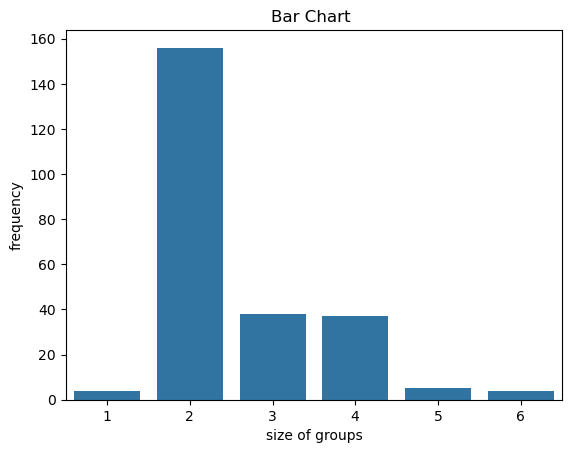

In [12]:
freq=tips['size'].value_counts().sort_index()
print(freq)


sns.barplot(x=freq.index, y=freq.values)

plt.title("Bar Chart ")
plt.xlabel("size of groups") ; plt.ylabel("frequency")
plt.show()

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


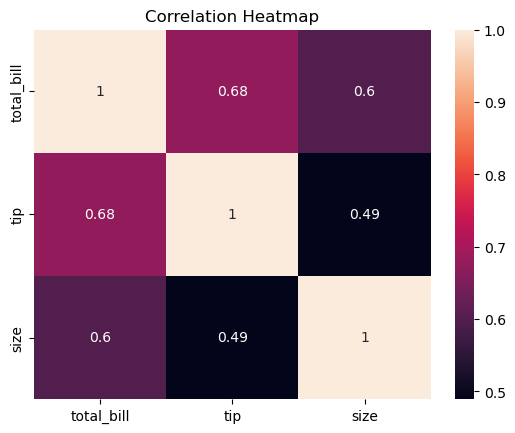

In [14]:
corr=tips[['total_bill','tip','size']].corr()
print(corr)

sns.heatmap(corr,annot=True)
plt.title("Correlation Heatmap")
plt.show()

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


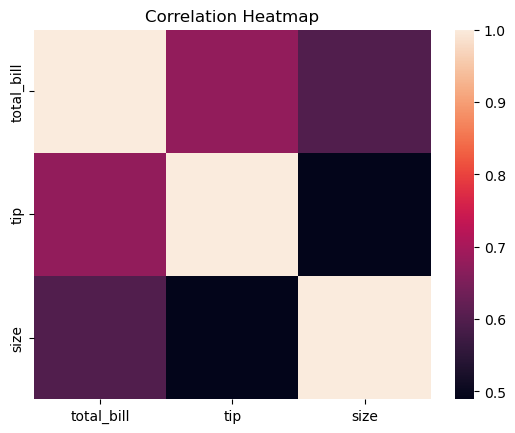

In [16]:
corr=tips[['total_bill','tip','size']].corr()
print(corr)

sns.heatmap(corr,annot=False)
plt.title("Correlation Heatmap")
plt.show()